# adan mwassi *-* 206603011
# mohmmad jebat *-* 211449053
# maysam enbtawi *-* 211639315
# *****************************


In [93]:
import pandas as pd
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from sklearn import metrics

# 2- load file and performs tokenization

In [94]:
# Load the data into a DataFrame
df = pd.read_csv('spam_ham_dataset.csv')
df.head()

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0


In [95]:
# Tokenize a pieces of text into words
df['tokens'] = df['text'].apply(lambda x: word_tokenize(x))
df['tokens']

0       [Subject, :, enron, methanol, ;, meter, #, :, ...
1       [Subject, :, hpl, nom, for, january, 9, ,, 200...
2       [Subject, :, neon, retreat, ho, ho, ho, ,, we,...
3       [Subject, :, photoshop, ,, windows, ,, office,...
4       [Subject, :, re, :, indian, springs, this, dea...
                              ...                        
5166    [Subject, :, put, the, 10, on, the, ft, the, t...
5167    [Subject, :, 3, /, 4, /, 2000, and, following,...
5168    [Subject, :, calpine, daily, gas, nomination, ...
5169    [Subject, :, industrial, worksheets, for, augu...
5170    [Subject, :, important, online, banking, alert...
Name: tokens, Length: 5171, dtype: object

# 3- EDA

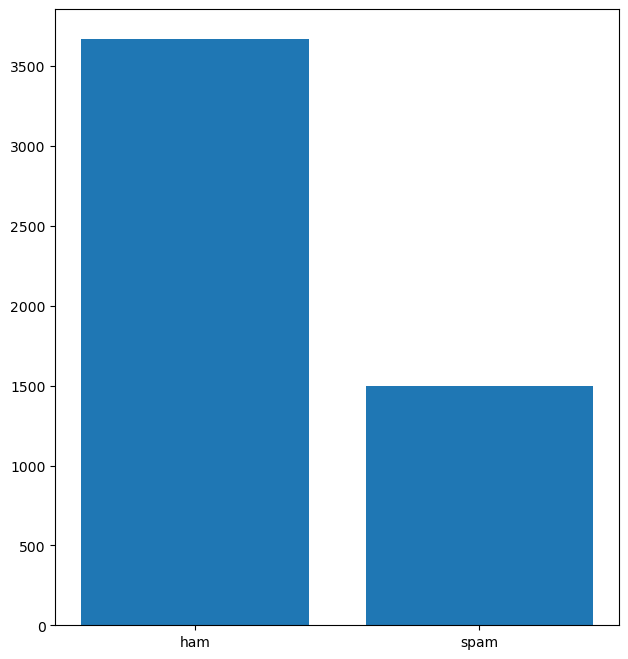

In [96]:
# ---EDA for ham/spam---
numofham = df[df.label == 'ham'].shape[0]
numofspam = df[df.label == 'spam'].shape[0]
plt.figure(1,figsize=(16,8))
plt.subplot(1,2,1)
_ = plt.bar(['ham', 'spam'], [numofham, numofspam])

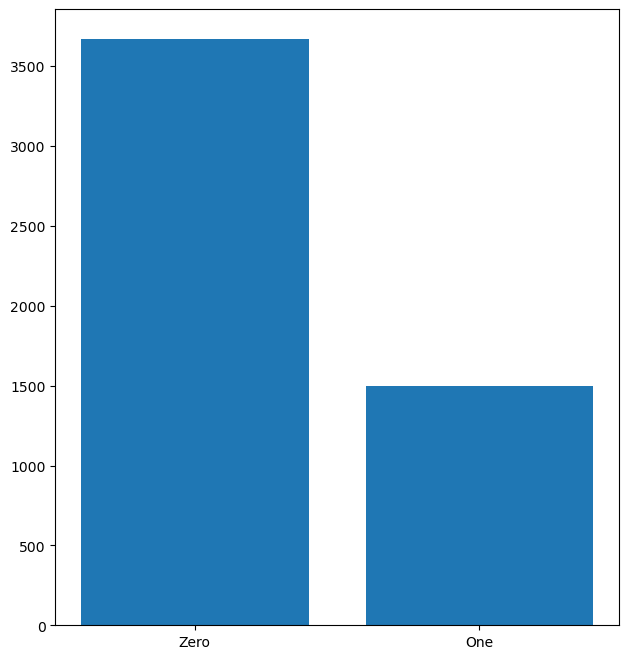

In [97]:
# ---EDA for 0/1---
numofZeros = df[df.label_num ==0].shape[0]
numofOne = df[df.label_num ==1].shape[0]
plt.figure(1,figsize=(16,8))
plt.subplot(1,2,1)
_ = plt.bar(['Zero', 'One'], [numofZeros, numofOne])

In [98]:
# ---EDA for texts---
vectorizer= CountVectorizer(lowercase=True,stop_words='english')
WordBag=vectorizer.fit_transform(df['text'])
# create dictionary for word frequncy
wordSum=WordBag.sum(axis=0)
Frequency=[(word,wordSum[0,idx])for word,idx in vectorizer.vocabulary_.items()]
#create dataframe
DfFrequency=pd.DataFrame(Frequency, columns=['word','frequency'])
DfFrequency=DfFrequency.sort_values(by='frequency',ascending=False)
DfFrequency

,word,frequency
1181,ect,13900
0,subject,8060
1180,hou,7289
1,enron,6555
455,2000,4386
...,...,...
27329,145125,1
27317,5665,1
27316,973,1
27313,edificador,1


# 4-Retrieval of features

In [99]:
train, test = train_test_split(df, test_size=0.2, random_state=1)
print(f'Dataset is spilt into train set and test set: \n'
      f'train set of:{train.shape[0]} records \ntest set of :{test.shape[0]} records')

Dataset is spilt into train set and test set: 
train set of:4136 records 
test set of :1035 records


In [100]:
#--Remove all the records that are null
df_train_text = train[~pd.isnull(train['text'])]['text']
df_test_text = test[~pd.isnull(test['text'])]['text']
print(f'Dataset is spilt into train set and test set: \n'
      f'train set of:{train.shape[0]} records \ntest set of :{test.shape[0]} records')

Dataset is spilt into train set and test set: 
train set of:4136 records 
test set of :1035 records


In [101]:
#TF/IDF
# We have to create a TfidfVectorizer object
vectorizer =TfidfVectorizer(lowercase=True,stop_words='english')

In [102]:
# Fit the vectorizer on the text data and transform it into a TF-IDF representation
TF_IDF_matrix_train = vectorizer.fit_transform(df_train_text)
print(f'train set has ({TF_IDF_matrix_train.shape[0]}) records and ({TF_IDF_matrix_train.shape[1]}) features')

train set has (4136) records and (44456) features


In [103]:
TF_IDF_matrix_test = vectorizer.transform(df_test_text)
print(f'test set has ({TF_IDF_matrix_test.shape[0]}) records and ({TF_IDF_matrix_test.shape[1]}) features')

test set has (1035) records and (44456) features


In [104]:
features_names = vectorizer.get_feature_names_out()
features_names

array(['00', '000', '0000', ..., 'zzo', 'zzocb', 'zzsyt'], dtype=object)

# 5- Classification

In [105]:
expected_output_train = train[~pd.isnull(train["text"])]["label_num"]
expected_output_test = test[~pd.isnull(test["text"])]["label_num"]

In [106]:
# ---train classifier---
from sklearn.linear_model import LogisticRegression

In [107]:
classefier= LogisticRegression(C=5,max_iter=1000)
classefier.fit(TF_IDF_matrix_train, expected_output_train)

LogisticRegression(C=5, max_iter=1000)

# 6-Evaluation

In [108]:
predictions = classefier.predict(TF_IDF_matrix_test)

In [109]:
recall = metrics.recall_score(expected_output_test, predictions)
recall

0.9967105263157895

In [110]:
precision= metrics.precision_score(expected_output_test, predictions)
precision

0.9805825242718447

In [111]:
accuracy = metrics.accuracy_score(expected_output_test, predictions)
accuracy

0.9932367149758454

In [112]:
f1 = metrics.f1_score(expected_output_test, predictions)
f1

0.9885807504078304

# 7- Another 3 different retrieval of features


run number : 1

In [113]:
vectorizer1 = TfidfVectorizer(stop_words="english")
TF_IDF_matrix_train = vectorizer1.fit_transform(df_train_text)
TF_IDF_matrix_test = vectorizer1.transform(df_test_text)

In [114]:
from sklearn.tree import DecisionTreeClassifier
classefier = DecisionTreeClassifier()
classefier.fit(TF_IDF_matrix_train, expected_output_train)

DecisionTreeClassifier()

In [115]:
predictions = classefier.predict(TF_IDF_matrix_test)

In [116]:
recall1 = metrics.recall_score(expected_output_test, predictions)
recall1

0.9078947368421053

In [117]:
precision1 = metrics.precision_score(expected_output_test, predictions)
precision1


0.8990228013029316

In [118]:
accuracy1 = metrics.accuracy_score(expected_output_test, predictions)
accuracy1

0.9429951690821256

In [119]:
f1_1 = metrics.f1_score(expected_output_test, predictions)
f1_1

0.9034369885433715

run number : 2

In [120]:
vectorizer2 = CountVectorizer(stop_words='english')
bow_matrix_train = vectorizer2.fit_transform(df_train_text)
bow_matrix_test = vectorizer2.transform(df_test_text)

In [121]:
classefier = DecisionTreeClassifier()
classefier.fit(bow_matrix_train, expected_output_train)

DecisionTreeClassifier()

In [122]:
predictions = classefier.predict(bow_matrix_test)

In [123]:
recall2 = metrics.recall_score(expected_output_test, predictions)
recall2

0.9111842105263158

In [124]:
precision2 = metrics.precision_score(expected_output_test, predictions)
precision2


0.8906752411575563

In [125]:
accuracy2 = metrics.accuracy_score(expected_output_test, predictions)
accuracy2


0.9410628019323671

In [126]:
f1_2 = metrics.f1_score(expected_output_test, predictions)
f1_2

0.9008130081300814

run number : 3

In [127]:
vectorizer3 = CountVectorizer(stop_words="english")
bow_matrix_train = vectorizer3.fit_transform(df_train_text)
bow_matrix_test = vectorizer3.transform(df_test_text)

In [128]:
classefier = LogisticRegression(C=5, max_iter=1000)
classefier.fit(bow_matrix_train, expected_output_train)


LogisticRegression(C=5, max_iter=1000)

In [129]:
predictions = classefier.predict(bow_matrix_test)


In [130]:
recall3 = metrics.recall_score(expected_output_test, predictions)
recall3


0.9736842105263158

In [131]:
precision3 = metrics.precision_score(expected_output_test, predictions)
precision3


0.961038961038961

In [132]:
accuracy3 = metrics.accuracy_score(expected_output_test, predictions)
accuracy3


0.9806763285024155

In [133]:
f1_3 = metrics.f1_score(expected_output_test, predictions)
f1_3

0.9673202614379085

# 8- table of measures .

In [134]:
new_df_for_measures= pd.DataFrame()
new_df_for_measures=new_df_for_measures.assign(columns =["recall" ,'prediction' , 'accuracy' , 'f1' ] ,TF_IDF_LR =[recall,precision,accuracy,f1] , TF_IDF_DT =[recall1,precision1,accuracy1,f1_1] , BOW_DT =[recall2,precision2,accuracy2,f1_2] , BOW_LR =[recall3,precision3,accuracy3,f1_3])
new_df_for_measures.T

,0,1,2,3
columns,recall,prediction,accuracy,f1
TF_IDF_LR,0.996711,0.980583,0.993237,0.988581
TF_IDF_DT,0.907895,0.899023,0.942995,0.903437
BOW_DT,0.911184,0.890675,0.941063,0.900813
BOW_LR,0.973684,0.961039,0.980676,0.96732


# 9 accuracy levels

In conclusion :
The most accurate model is the TF_IDF_LR model ,
Because the level of accuracy is the highest with the aforementioned run (which received the highest score) = 0.993237 ,
The reason goes back to the small use of n-grams and stop words.